<h1>Lesson 5. Model selection: US Salary Prediction</h1>

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/White_House_lawn_%281%29.tif/lossy-page1-2433px-White_House_lawn_%281%29.tif.jpg style="height:300px;">
  
<p>In this exercise you will use the US Adult Census data relating income to social factors such as Age, Education, race etc...</p>

<p>The goal here is to train a binary classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset.</p>


In [226]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split


train=pd.read_csv('census-training.csv')
print(train.info())
train.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            48842 non-null  int64 
 1   EducationNum   48842 non-null  int64 
 2   MaritalStatus  48842 non-null  object
 3   Occupation     48842 non-null  object
 4   Relationship   48842 non-null  object
 5   Race           48842 non-null  object
 6   Gender         48842 non-null  object
 7   Hours/Week     48842 non-null  int64 
 8   Country        48842 non-null  object
 9   Income         48842 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB
None


,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K.
5,34,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K.
6,29,9,Never-married,?,Unmarried,Black,Male,40,United-States,<=50K.
7,63,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K.
8,24,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K.
9,55,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K.


<h3>Q.1. Write a command that will calculate the number of unique values for each feature in the training data.</h3>

In [227]:
train.nunique()


Age              74
EducationNum     16
MaritalStatus     7
Occupation       15
Relationship      6
Race              5
Gender            2
Hours/Week       96
Country          42
Income            4
dtype: int64

<h3>Q.2. There is a special character '?' inserted in the data in place of null values.  Write a command that will remove it and replace with NaN.</h3>

In [228]:
# Command (s): remove the '?' special character and replace with NaN
train = train.replace('?', np.nan)
train.isnull().sum() #checking the dataset for NaN values .... NaN values in two columns

Age                 0
EducationNum        0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
Gender              0
Hours/Week          0
Country           857
Income              0
dtype: int64

<h3>Q.3. Replace all missing values in Occupation and Country by their mode (most occuring values). </h3>

In [235]:
#Command(s):
train = pd.read_csv('census-training.csv')
train = train.replace('?', np.nan)

occupation_mode = train["Occupation"].mode()[0]
country_mode = train["Country"].mode()[0]
train["Occupation"].fillna(occupation_mode, inplace=True)
train["Country"].fillna(country_mode, inplace=True)

#replace missing values with their mode
train.isnull().sum() #checking the data for NaN values .... should all show 0 now

Prof-specialty
United-States


Age              0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Gender           0
Hours/Week       0
Country          0
Income           0
dtype: int64

<h3>Q.4. Write functions to replace Gender and Income attributes to "0" and "1". </h3>

In [264]:
# PREP WORK TO WORK WITH CLEAN DATA
train = pd.read_csv('census-training.csv')
train = train.replace('?', None)
occupation_mode = train["Occupation"].mode()[0]
country_mode = train["Country"].mode()[0]
train["Occupation"].fillna(occupation_mode, inplace=True)
train["Country"].fillna(country_mode, inplace=True)
# END PREP WORK

# FYI, this takes quite a while on this jupyter server, but is quick on my machine
# converting Gender to "0" and "1"
def gender_to_numeric(x):
    for key, val in x['Gender'].items():
        if str(val) == 'Male':
            x.at[key, 'Gender'] = 1
        else:
            x.at[key, 'Gender'] = 0
    return x['Gender']

train['Gender'] = gender_to_numeric(train)
#
# converting Inccome to "0" and "1"
def income_to_numeric(x):
    for key, val in x['Income'].items():
        if '>' in str(val):
            x.at[key, 'Income'] = 1
        else:
            x.at[key, 'Income'] = 0
    return x['Income']

train['Income'] = income_to_numeric(train)
train.head(10)

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,1,40,United-States,0
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,1,50,United-States,0
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,1,40,United-States,1
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,40,United-States,1
4,18,10,Never-married,Machine-op-inspct,Own-child,White,0,30,United-States,0
5,34,6,Never-married,Other-service,Not-in-family,White,1,30,United-States,0
6,29,9,Never-married,Other-service,Unmarried,Black,1,40,United-States,0
7,63,15,Married-civ-spouse,Prof-specialty,Husband,White,1,32,United-States,1
8,24,10,Never-married,Other-service,Unmarried,White,0,40,United-States,0
9,55,4,Married-civ-spouse,Craft-repair,Husband,White,1,10,United-States,0


<h3>Q.5. Use the label encoder API to encode all object-type in the data. </h3>

In [138]:
# Command(s) 
obj = train.select_dtypes(include=['object']) #all features that are 'object' datatypes
le = preprocessing.LabelEncoder()
for i in range(len(obj.columns)):
    train[obj.columns[i]] = le.fit_transform(train[obj.columns[i]])
    
train.head(10) #Inspect the data, all features should be numeric now

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,4,6,3,2,1,40,38,0
1,38,9,2,4,0,4,1,50,38,0
2,28,12,2,10,0,4,1,40,38,1
3,44,10,2,6,0,2,1,40,38,1
4,18,10,4,6,3,4,0,30,38,0
5,34,6,4,7,1,4,1,30,38,0
6,29,9,4,7,4,2,1,40,38,0
7,63,15,2,9,0,4,1,32,38,1
8,24,10,4,7,4,4,0,40,38,0
9,55,4,2,2,0,4,1,10,38,0


<h3>Q.6. Split the data into 70% training and 30% test </h3>

In [154]:
from sklearn.model_selection import train_test_split
X = train.iloc[:, :-1].values
y = train.iloc[:, 9].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(34189, 9)

<h3>Q.7. Train the logistic regression model on the train dataset and evaluate its performance on the test dataset.</p>

Accuracy: 0.8114379307991537
AUC: 0.6702842319752318


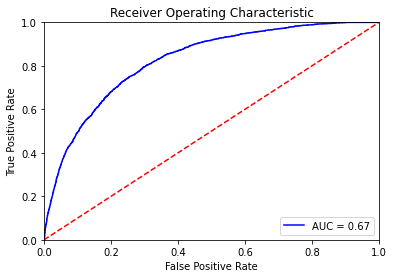

In [161]:
#Initialize classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score

# fit X_train and y_train
log_rgr = LogisticRegression(max_iter=10000)
model_log_rgr = log_rgr.fit(X_train, y_train)

#predict on the test set
y_pred = model_log_rgr.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred) # Compute the accuracy score
# calculate the fpr and tpr for all thresholds of the classification
probs = log_rgr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, y_pred) #TODO
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3>Q.8. Train the KNN classifier (with k=15) on the train dataset and evaluate its performance on the test dataset. Compare your results with the one above</p>

Accuracy: 0.8150549375554494
AUC: 0.720232926376596


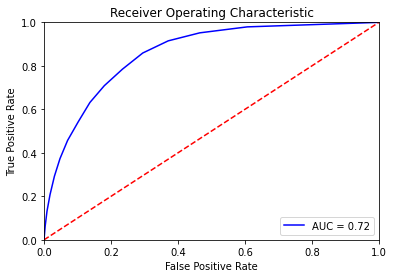

In [156]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier with k=15
knn = KNeighborsClassifier(n_neighbors=15)

# fit X_train and y_train
k_model = knn.fit(X_train, y_train)

y_pred = k_model.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred) # Compute the accuracy score

# calculate the fpr and tpr for all thresholds of the classification
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print("Accuracy: {}".format(knn_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Compare results
# The accuracy for the Logistic Regression model is 0.811 while KNN is 0.815. The ROC AUC for the logistic model is
# 0.670 while the KNN is 0.72. A higher AUC and Higher accuracy are better in this case, so KNN is a better model.
# Note: I did need to increase the max_iter on the logistic model.

<h3>Q.9. Perform recursive feature elimination (5 features) on the dataset using the logistic regression classifier. Any difference in the results? Explain.</h3>

In [172]:
from sklearn.feature_selection import RFE
rfe =  RFE(model_log_rgr, n_features_to_select=5) #TODO
# TODO: fit X_train and y_train
rfe = rfe.fit(X_train, y_train)

y_pred = rfe.predict(X_test) # TODO
lr_acc = accuracy_score(y_test, y_pred) #TODO: Compute the accuracy score
# calculate the fpr and tpr for all thresholds of the classification
probs = rfe.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, y_pred) #TODO
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))
# Very little difference is observed with the RFE, as our initial logistic function was at an accuracy of 0.811 and the new
# one is up slightly, at 0.813. The AUC actually went down using this method by about 0.002.
# 0.668 for this method, and our previous logistic model was at 0.670.

Accuracy: 0.8130075752405651
AUC: 0.6686641360069511
